## Check for feature importance

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default='notebook'
from plotly.subplots import make_subplots
import folium

In [706]:
tripdata = pd.read_csv("../dataset/complete_bike_sharing.csv")
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353892 entries, 0 to 353891
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             353892 non-null  int64  
 1   starttime                353892 non-null  object 
 2   stoptime                 353892 non-null  object 
 3   start station id         353892 non-null  int64  
 4   start station name       353892 non-null  object 
 5   start station latitude   353892 non-null  float64
 6   start station longitude  353892 non-null  float64
 7   end station id           353892 non-null  int64  
 8   end station name         353892 non-null  object 
 9   end station latitude     353892 non-null  float64
 10  end station longitude    353892 non-null  float64
 11  bikeid                   353892 non-null  int64  
 12  usertype                 353892 non-null  object 
 13  birth year               353892 non-null  int64  
 14  gend

In [707]:
def convert_min(x):
    return x/60
tripdata['tripduration'] = tripdata['tripduration'].apply(convert_min)
tripdata.head(3)

tripduration                starttime                 stoptime  \
0     15.533333  2018-01-01 02:06:17.541  2018-01-01 02:21:50.027   
1      9.166667  2018-01-01 12:06:18.039  2018-01-01 12:15:28.443   
2      8.500000  2018-01-01 12:06:56.978  2018-01-01 12:15:27.810   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   

   start station longitude  end station id end station name  \
0               -74.033459            3199     Newport Pkwy   
1               -74.033459            3199     Newport Pkwy   
2               -74.033459            3199     Newport Pkwy   

   end station latitude  ...  humidity  snow snowdepth  windspeed  visibility  \
0             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
1             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
2             40.728745  ...      47.8   0.0       0.1       18.5        16.0   

   solarradiation  cloudcover conditions  \
0           106.7         0.3      Clear   
1           106.7         0.3      Clear   
2           106.7         0.3      Clear   

                            description seasons  
0  Clear conditions throughout the day.  winter  
1  Clear conditions throughout the day.  winter  
2  Clear conditions throughout the day.  winter  

[3 rows x 42 columns]

### Relation between age , trip duration and kind of user ridership 

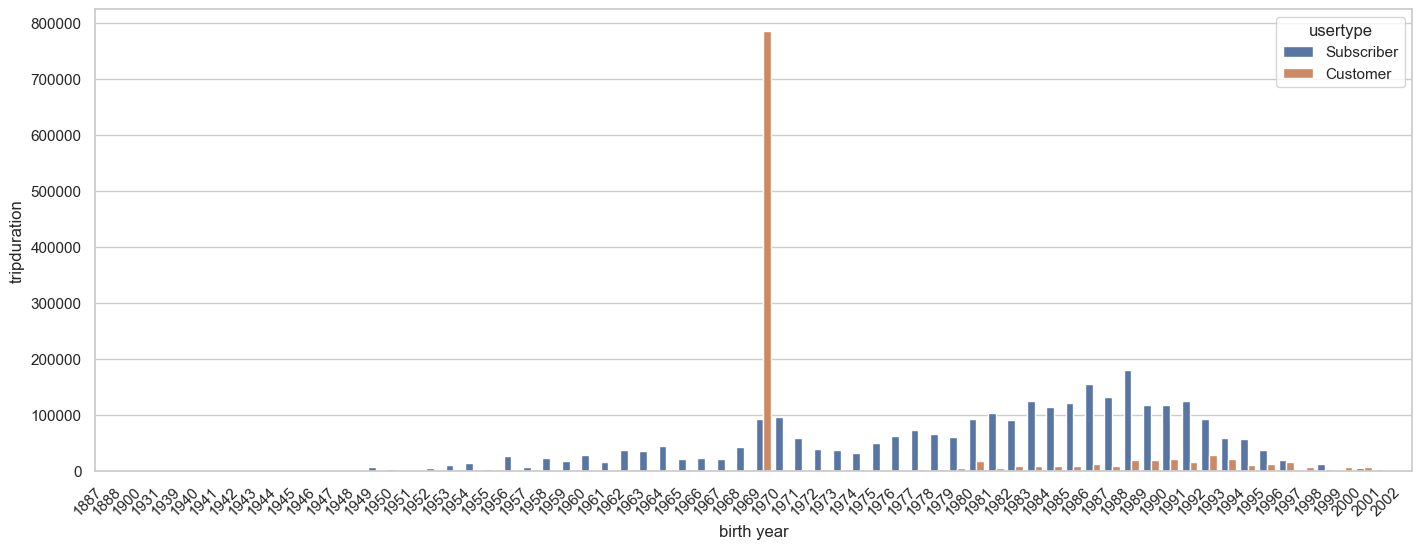

In [708]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['birth year','usertype'])['tripduration'].agg('sum').reset_index()
fig = sns.barplot(data=df, x="birth year", y="tripduration", hue="usertype", ci=None, ax=ax)
bithyear = df['birth year'].sort_values().unique()
ax.set_xticklabels(labels=bithyear, rotation=45, ha='right')
plt.show()

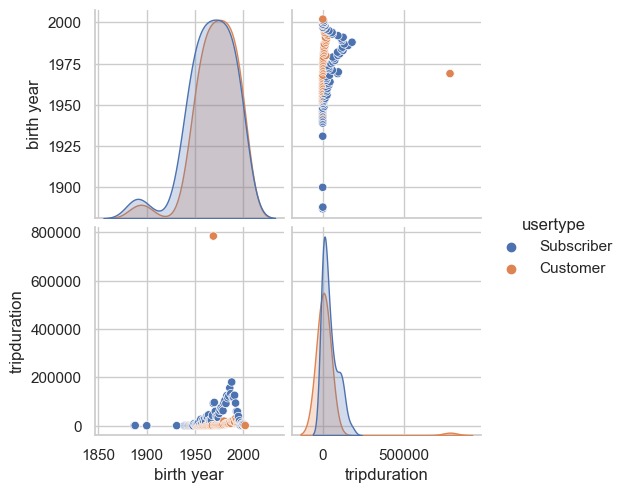

In [709]:
sns.pairplot(df, hue="usertype")

In [710]:
tripdata['birthyear'] = pd.to_numeric(tripdata['birth year'], downcast='integer')
tripdata['Years_old'] = tripdata['year'] - tripdata['birthyear'] 
Age_Groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60-64","65+"]
Age_Groups_Limits = [0, 20, 30, 40, 50, 60, 65, np.inf]
Age_Min = 0
Age_Max = 100
tripdata["Age_group"] = pd.cut(tripdata["Years_old"], Age_Groups_Limits, labels=Age_Groups)

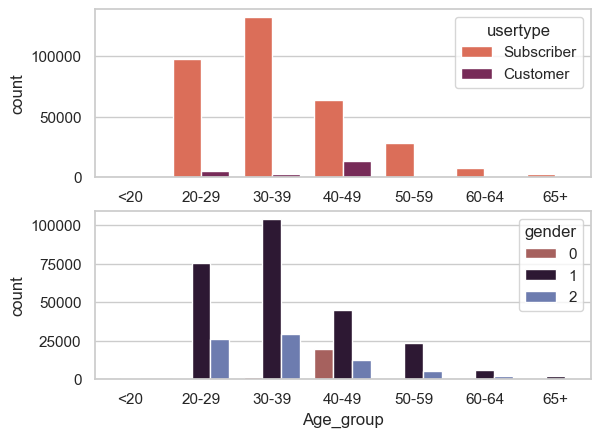

<Figure size 1700x600 with 0 Axes>

In [711]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (17,6))
sns.countplot(tripdata["Age_group"],hue=tripdata["usertype"],palette="rocket_r",ax=axes[0])
sns.countplot(tripdata["Age_group"],hue=tripdata["gender"],palette="twilight_r",ax=axes[1])
plt.show()

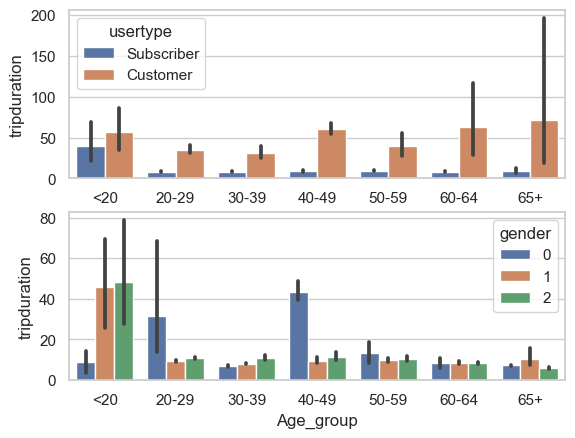

<Figure size 3000x500 with 0 Axes>

In [712]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (30,5))
sns.barplot(data=tripdata,x='Age_group', y="tripduration" , hue="usertype" , ax=axes[0])

sns.barplot(data=tripdata,x='Age_group', y="tripduration" , hue="gender" , ax=axes[1])
plt.show()

In [713]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['gender', 'usertype'])

fig.add_trace(
    go.Pie(labels=tripdata['gender'].value_counts().index, values=tripdata['gender'].value_counts(), name="gender"),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=tripdata['usertype'].value_counts().index, values=tripdata['usertype'].value_counts(), name="usertype"),
    row=1, col=2
)


fig.update_layout(title_text='Distribution of trip duration on user type and gender(1 : Male, 2 : Female, 0 : No_Gender)')
fig.show()

In [714]:
User = pd.DataFrame()
User['avg_trip duration'] = round(tripdata.groupby('usertype')['tripduration'].mean())
User = User.reset_index()
User['usertype'] = User['usertype'].astype('object')
User


usertype  avg_trip duration
0    Customer               50.0
1  Subscriber                9.0

#### comments:
1. Overall 72% riders are male where only 21% are female
2. Nearly 94% riders are annual subscribers  where 6 % are single-ride or day pass purchasers.
3. Highest Number of subscriber are in the age group 30-39 and less in age group below 20
4. Highest number of single-ride or day pass purchasers are 40-49 rest other are very less.
5. Age group 30-39 both female and male users.
6. more number of trips durations completed who are below 20 age males and females.
7. more number of rides durations complted by age above 65 age group who are using single-ride or day pass purchasers.
8. Averge trip duration for single-ride or day pass purchasers is more than annual subscribers.

### Find out what are the Peak Bike Rides are!!!?

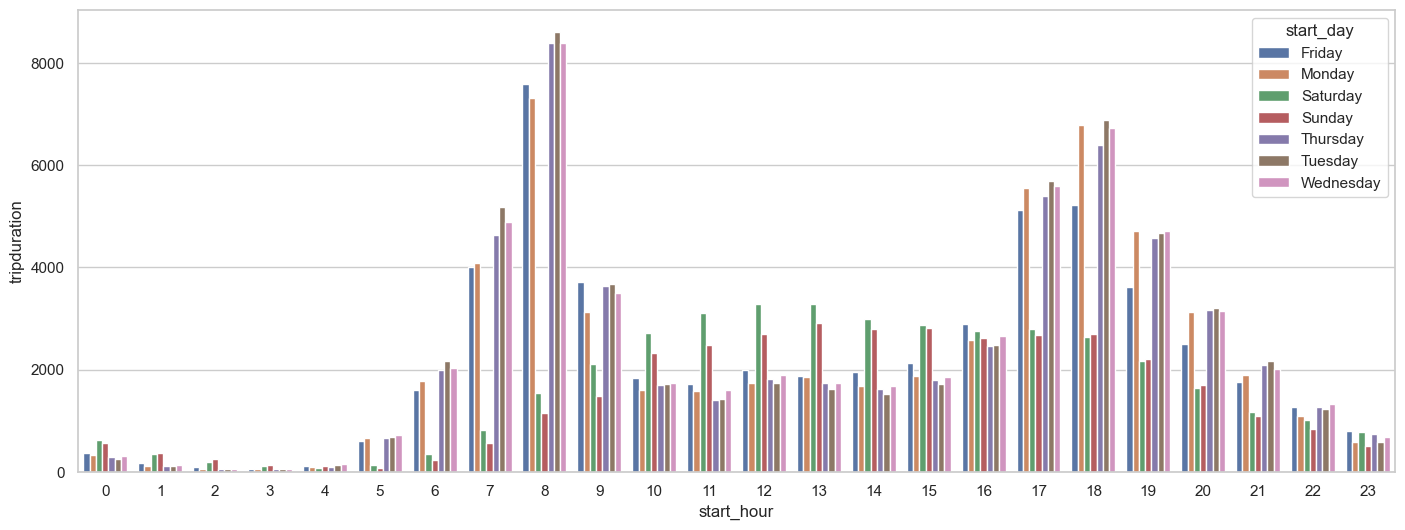

In [717]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['start_hour','start_day'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="start_hour", y="tripduration", hue="start_day", ci=None)
plt.show()

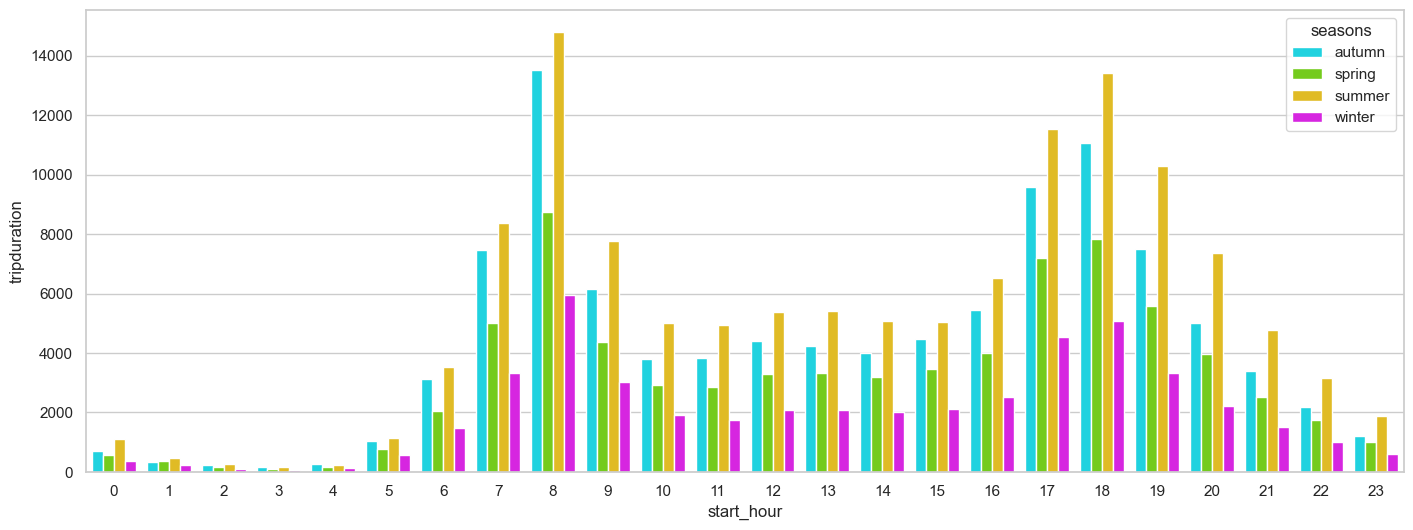

In [718]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['start_hour','seasons'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="start_hour", y="tripduration", hue="seasons", ci=None, palette="gist_ncar")
plt.show()

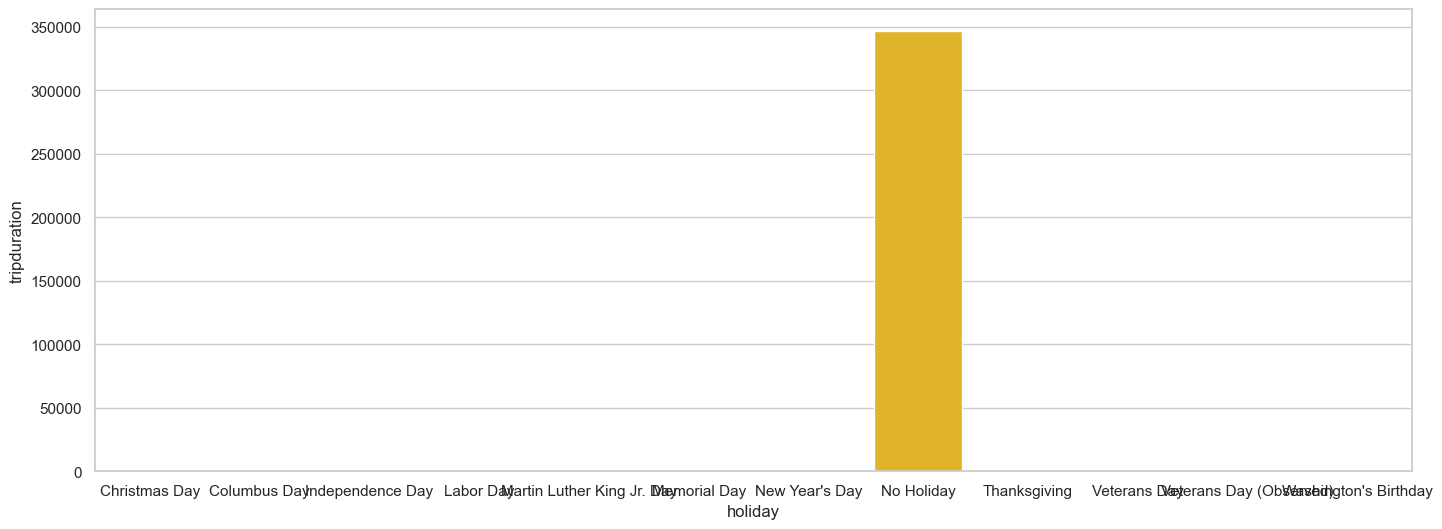

In [719]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['holiday'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="holiday", y="tripduration", ci=None, palette="gist_ncar")
plt.show()

#### Comments about peak rides
1. most of the peak hours rides starts in the morning 8am and evening 17-18 pm on weekdays
2. most of the peak hours rides starts in the morning 8am and evening 17-18 pm in summer and Autum seasons
3. Riders used bikes on working days all the time.

### Find out which stations are most famous ?

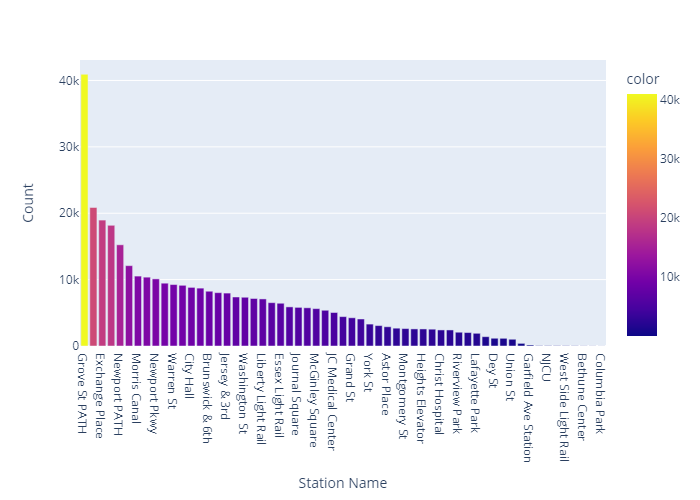

In [720]:
fig = px.bar(x=tripdata["start station name"].value_counts().index,
       y=tripdata["start station name"].value_counts().values,
       color=tripdata["start station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

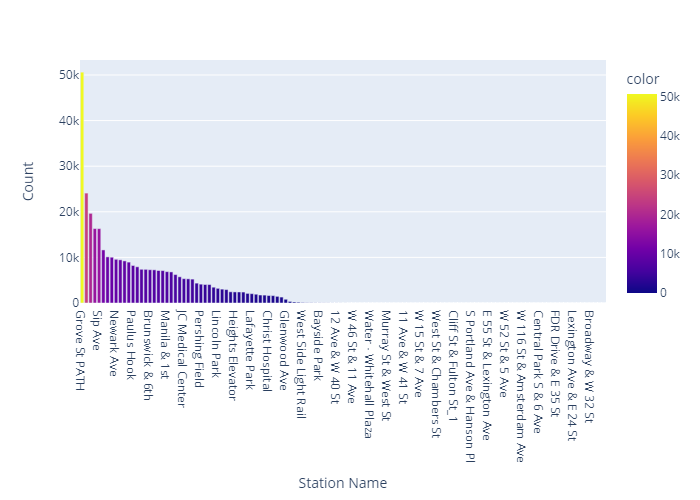

In [721]:
fig = px.bar(x=tripdata["end station name"].value_counts().index,
       y=tripdata["end station name"].value_counts().values,
       color=tripdata["end station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

In [722]:
trips_df = pd.DataFrame()
trips_df = tripdata.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Routes"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

index start station name end station name  Number of Trips  \
0   1008      Hamilton Park    Grove St PATH             7874   
1    955      Grove St PATH    Hamilton Park             5871   
2   1937       Morris Canal   Exchange Place             4604   
3    239    Brunswick & 6th    Grove St PATH             4265   
4   1364    Jersey & 6th St    Grove St PATH             4135   
5    292       Brunswick St    Grove St PATH             3989   
6    740     Exchange Place     Morris Canal             3319   
7    610        Dixon Mills    Grove St PATH             3280   
8   1733   Marin Light Rail    Grove St PATH             3216   
9   2491     Van Vorst Park    Grove St PATH             3177   

                              Routes  
0     Hamilton Park to Grove St PATH  
1     Grove St PATH to Hamilton Park  
2     Morris Canal to Exchange Place  
3   Brunswick & 6th to Grove St PATH  
4   Jersey & 6th St to Grove St PATH  
5      Brunswick St to Grove St PATH  
6     Exchange Place to Morris Canal  
7       Dixon Mills to Grove St PATH  
8  Marin Light Rail to Grove St PATH  
9    Van Vorst Park to Grove St PATH

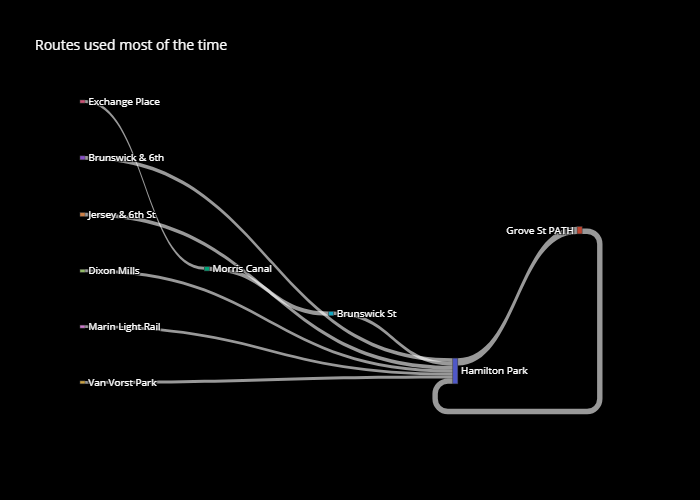

In [723]:
label = ["Hamilton Park", "Grove St PATH", "Morris Canal", "Brunswick & 6th", 
         "Jersey & 6th St", "Brunswick St", "Exchange Place", "Dixon Mills",
         "Marin Light Rail", "Van Vorst Park", "Grove St PATH", "Hamilton Park", 
         "Exchange Place", "Grove St PATH"," Grove St PATH", "Grove St PATH", 
         "Morris Canal", "Grove St PATH", "Grove St PATH"," Grove St PATH"]

source = [0,1,2,3,4,5,6,7,8,9]
target = [1, 0, 5, 0, 0, 0, 2, 0, 0, 0 ]
value = [7874, 5871, 4604, 4265, 4135, 3989, 3319, 3280, 3216, 3177]

link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)



fig = go.Figure(data)
fig.update_layout(
    
    title="Routes used most of the time",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show("png")

In [724]:
df_sub = tripdata[['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude']]
df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']
df_sub = df_sub.groupby(['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude'])['both'].count().reset_index(name='Counts of trips')

df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
df_sub.head()

start station name         end station name  start station latitude  \
9   5 Corners Library  Communipaw & Berry Lane               40.734961   
23  5 Corners Library               JCBS Depot               40.734961   
51        Astor Place          6 Ave & W 33 St               40.719282   
54        Astor Place    Barrow St & Hudson St               40.719282   
56        Astor Place    Broadway & Battery Pl               40.719282   

    start station longitude  end station latitude  end station longitude  \
9                -74.059503             40.714358             -74.066611   
23               -74.059503             40.709651             -74.068601   
51               -74.071262             40.749013             -73.988484   
54               -74.071262             40.731724             -74.006744   
56               -74.071262             40.704633             -74.013617   

    Counts of trips  
9                 1  
23                1  
51                1  
54                1  
56                1

In [725]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end station latitude"], row["end station longitude"]], popup=row["end station name"],radius=5, color="Black").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start station latitude"], row["start station longitude"]],popup=row["start station name"]).add_to(map1), axis=1)

map1

### comments on famous stations:
1. Grove St Path is the most used station than other stations and some of the stations no single trip is being recorded
2. Grove St PATH is the most popular route where end and start rides taken place.

### Which bikes are used most?

In [726]:
bike_use_df = pd.DataFrame()
bike_use_df = tripdata.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bikeid'] = bike_use_df['bikeid'].astype(str)
bike_use_df['bikeid'] = ('Bike ' + bike_use_df['bikeid'])
bike_use_df = bike_use_df.reset_index()
bike_use_df.head()

index      bikeid  Number of Times Used
0     71  Bike 26155                   873
1    201  Bike 26288                   854
2    518  Bike 29586                   842
3    530  Bike 29598                   836
4    540  Bike 29608                   833

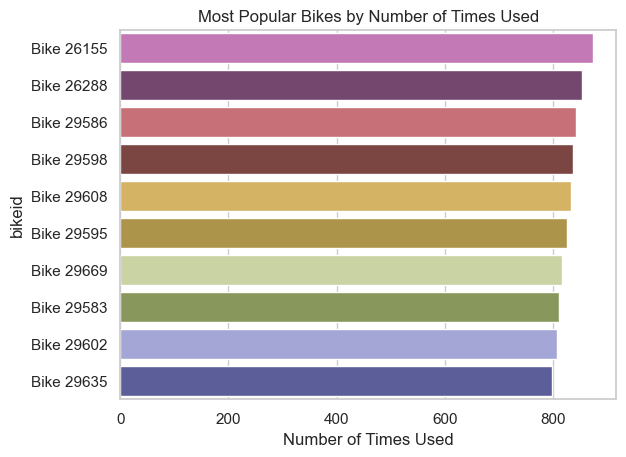

In [727]:
ax8 = sns.barplot('Number of Times Used', 'bikeid',data = bike_use_df, palette="tab20b_r")
ax8.set_title('Most Popular Bikes by Number of Times Used')
plt.show()

### How weather affecting the rides?

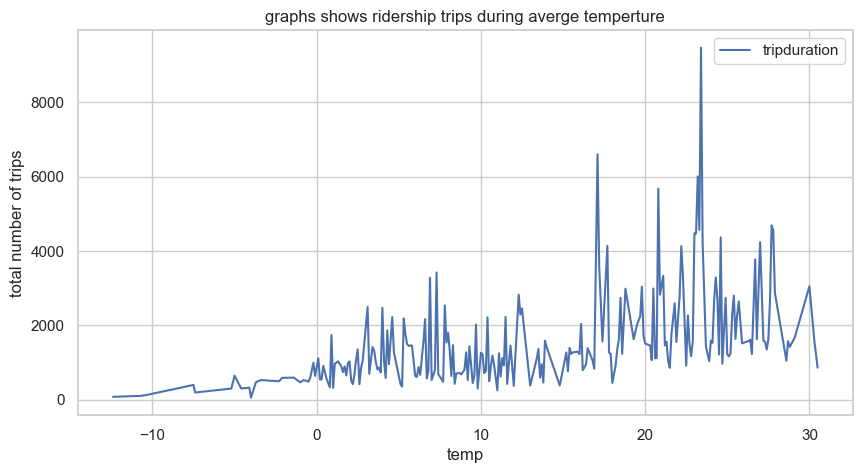

In [728]:
df = tripdata.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during averge temperture')
ax.set(xlabel='temp', ylabel='total number of trips')
plt.show()          

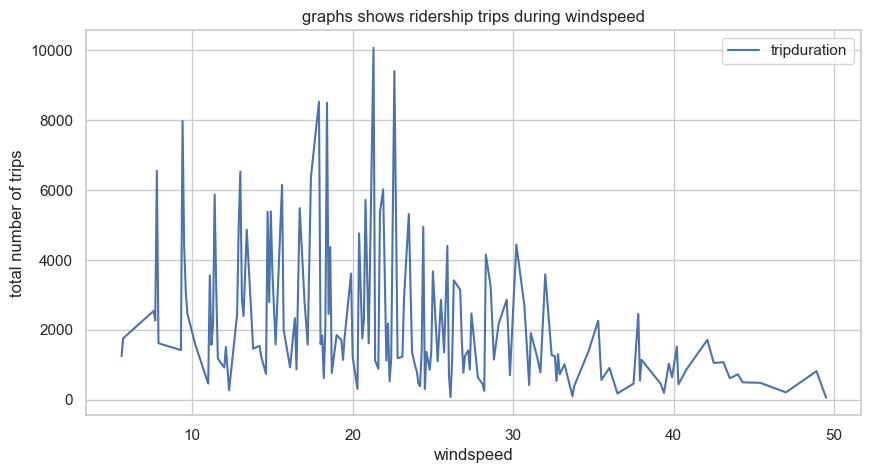

In [729]:
df = tripdata.groupby(['windspeed'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='windspeed', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during windspeed')
ax.set(xlabel='windspeed', ylabel='total number of trips')
plt.show()    

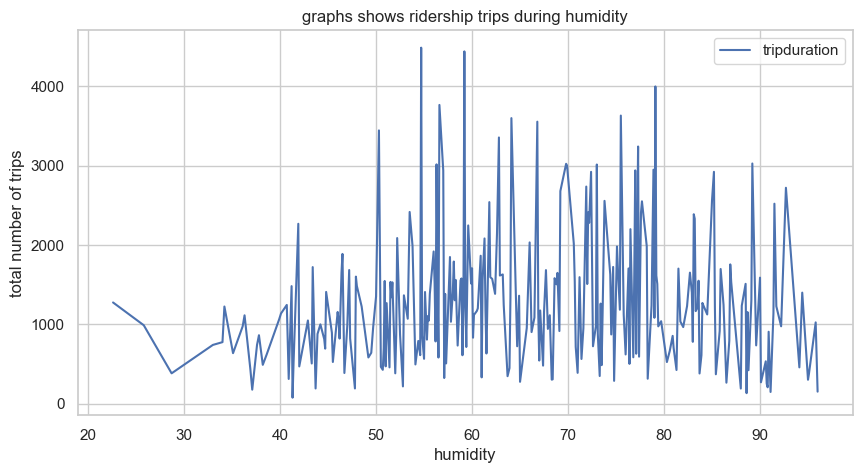

In [730]:
df = tripdata.groupby(['humidity'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='humidity', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during humidity')
ax.set(xlabel='humidity', ylabel='total number of trips')
plt.show()      

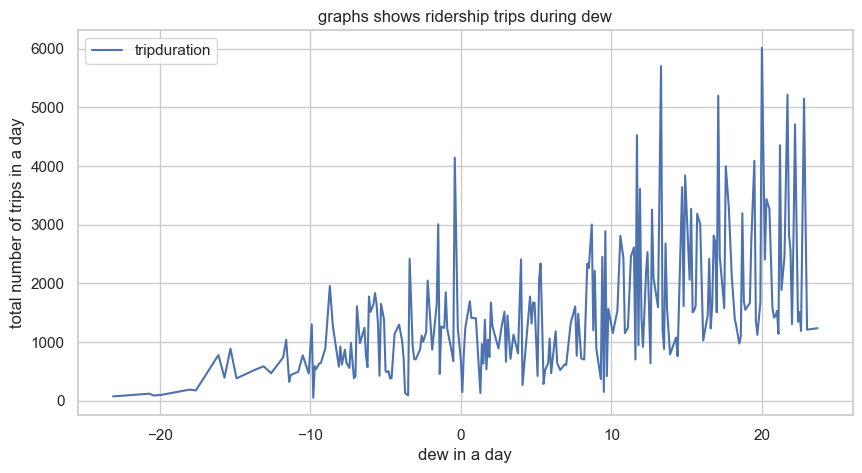

In [731]:
df = tripdata.groupby(['dew'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='dew', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during dew')
plt.xlabel("dew in a day")
plt.ylabel('total number of trips in a day');  

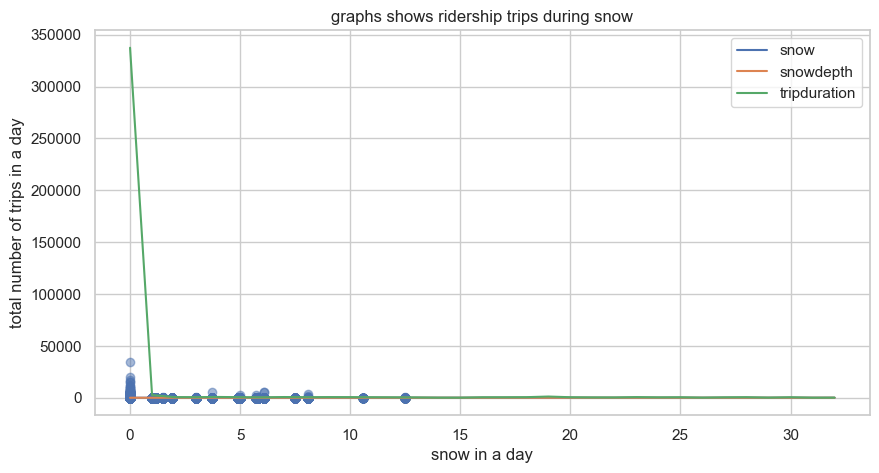

In [732]:
df = tripdata.groupby(['snow','snowdepth'])['tripduration'].agg('count').reset_index()
df
ax = df.plot(figsize=(10,5),title='graphs shows ridership trips during snow')
plt.scatter(tripdata['snow'], tripdata['tripduration'], alpha=0.5, cmap='viridis')
plt.xlabel("snow in a day")
plt.ylabel('total number of trips in a day');

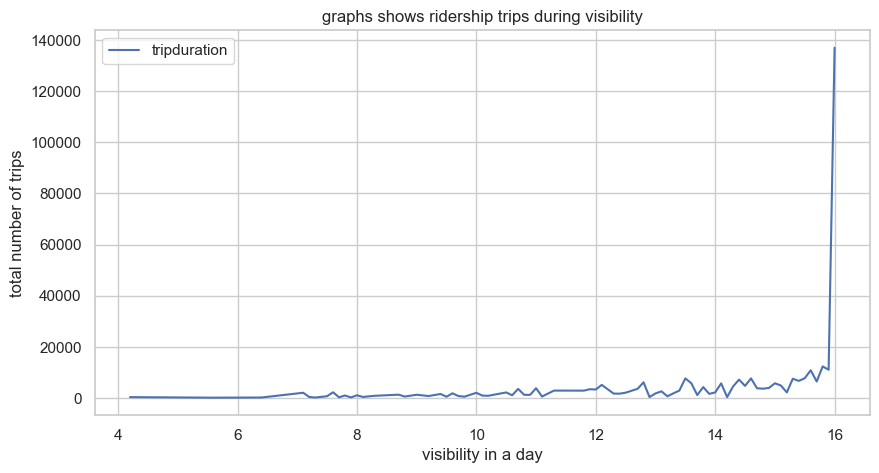

In [733]:
df = tripdata.groupby(['visibility'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='visibility' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during visibility')
plt.xlabel("visibility in a day")
plt.ylabel('total number of trips'); 

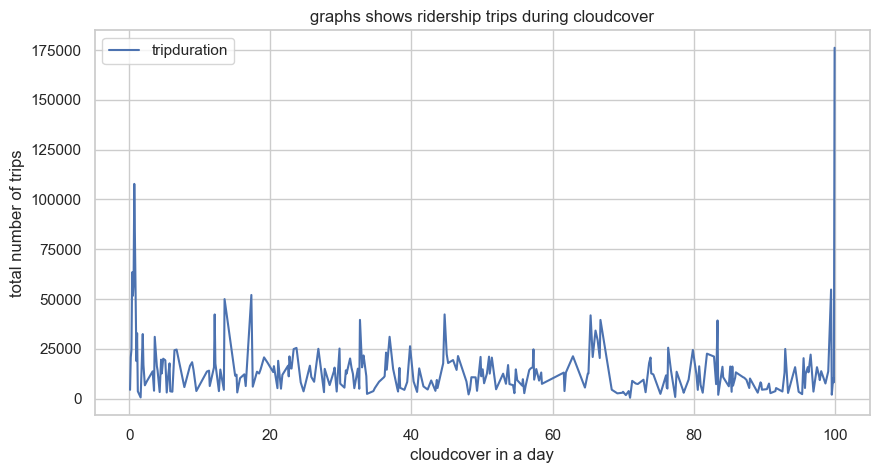

In [734]:
df = tripdata.groupby(['cloudcover'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='cloudcover' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during cloudcover')
plt.xlabel("cloudcover in a day")
plt.ylabel('total number of trips');  

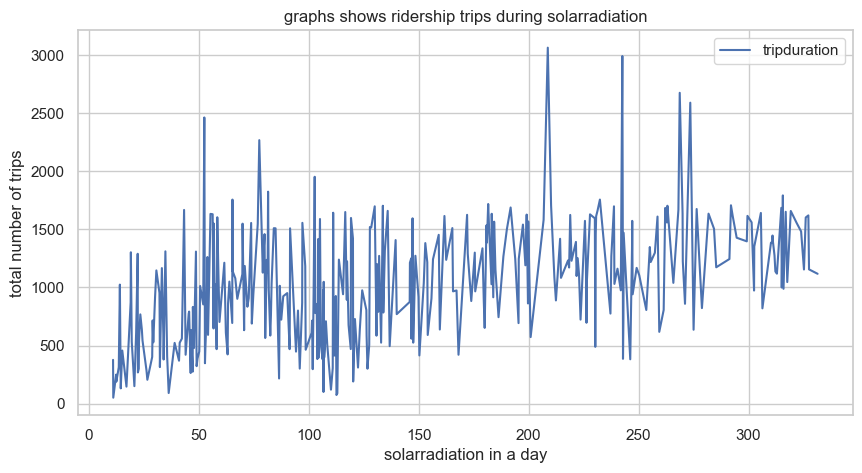

In [735]:
df = tripdata.groupby(['solarradiation'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='solarradiation' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during solarradiation')
plt.xlabel("solarradiation in a day")
plt.ylabel('total number of trips');  

<AxesSubplot:xlabel='tripduration', ylabel='conditions'>

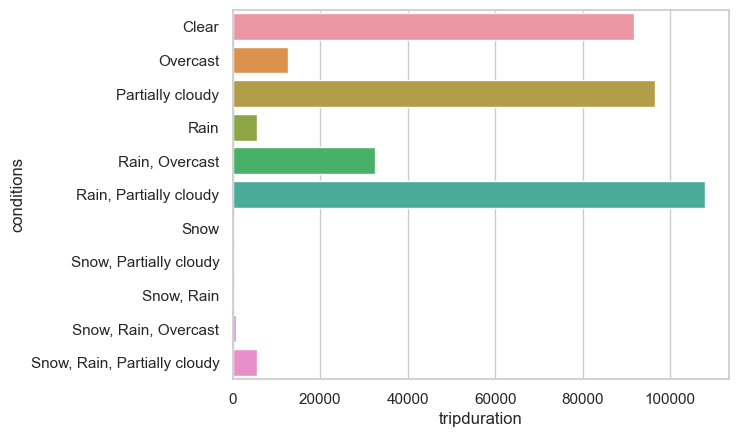

In [736]:
df = tripdata.groupby(['conditions'])['tripduration'].agg('count').reset_index()
plt.xlabel("weather conditions in a day")
plt.ylabel('total number of trips in a day');  
sns.barplot(data=df,x='tripduration', y="conditions")

#### comments on weather data and number of trips reported.

1. When the average temperature in between 20-27 the number of trips are more when avaerge temperture is below zero the trips almost nill.
2. Windspeed and tripduration negitively correlated, when it's below 28mph then higher number of rides are reported.
3. When humidity is between 50-78 % rh repoted good amount of trips.
4. As dew increases trips also incraesing.
5. When there is no snow we have more number of riders than when snow/snow depth reported.
6. Visibilty between 15-16 we have peaks in the trips otherwise the trips are almost Nill.
7. Cloudcover didn't give much value for tripduration but oscilate between 0-100 (when it's 0 and 100 has highest number of rides)
8. When the weather is clear, partly cloud and expected rain has more number of rides reported.


### Check some correlation between the features and target variable tripduration 

In [737]:
df = tripdata.drop(columns=['year', 'birth year','Years_old'], axis=1)
df.head(3)

tripduration                starttime                 stoptime  \
0     15.533333  2018-01-01 02:06:17.541  2018-01-01 02:21:50.027   
1      9.166667  2018-01-01 12:06:18.039  2018-01-01 12:15:28.443   
2      8.500000  2018-01-01 12:06:56.978  2018-01-01 12:15:27.810   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   

   start station longitude  end station id end station name  \
0               -74.033459            3199     Newport Pkwy   
1               -74.033459            3199     Newport Pkwy   
2               -74.033459            3199     Newport Pkwy   

   end station latitude  ...  snowdepth  windspeed visibility  solarradiation  \
0             40.728745  ...        0.1       18.5       16.0           106.7   
1             40.728745  ...        0.1       18.5       16.0           106.7   
2             40.728745  ...        0.1       18.5       16.0           106.7   

   cloudcover conditions                           description seasons  \
0         0.3      Clear  Clear conditions throughout the day.  winter   
1         0.3      Clear  Clear conditions throughout the day.  winter   
2         0.3      Clear  Clear conditions throughout the day.  winter   

  birthyear  Age_group  
0      1992      20-29  
1      1969      40-49  
2      1946        65+  

[3 rows x 42 columns]

In [740]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['usertype']= label_encoder.fit_transform(df['usertype'])
df['start_day']= label_encoder.fit_transform(df['start_day'])
df['end_day'] = label_encoder.fit_transform(df['end_day'])
df['start_month']= label_encoder.fit_transform(df['start_month'])
df['end_month']= label_encoder.fit_transform(df['end_month'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['conditions'] = label_encoder.fit_transform(df['conditions'])               
df['description'] = label_encoder.fit_transform(df['description'])           
df['seasons'] = label_encoder.fit_transform(df['seasons'])

In [741]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

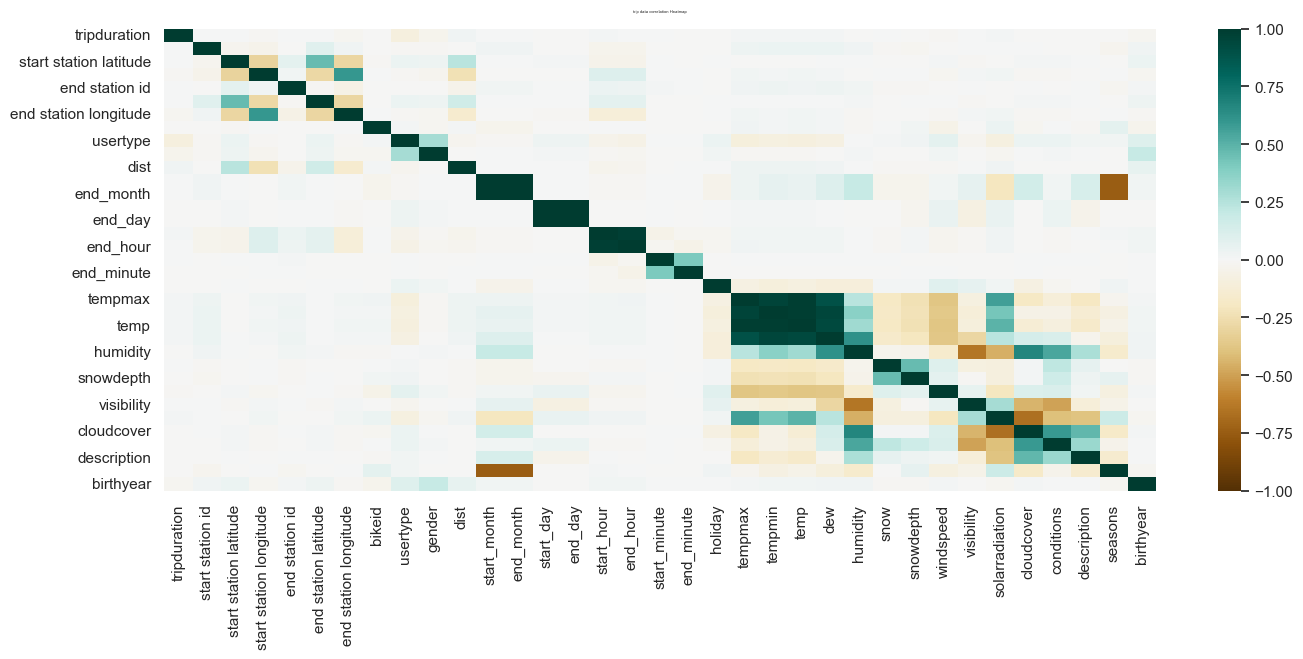

In [742]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('trip data correlation Heatmap', fontdict={'fontsize':3}, pad=12);

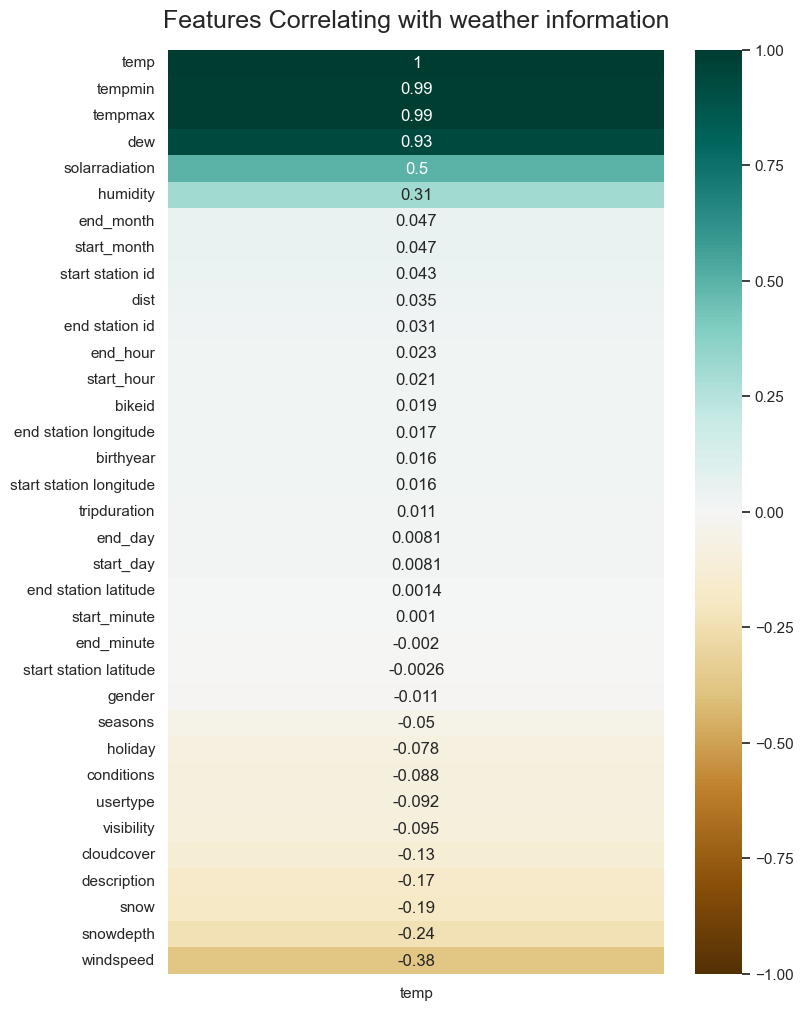

In [743]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['temp']].sort_values(by='temp', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with weather information', fontdict={'fontsize':18}, pad=16);

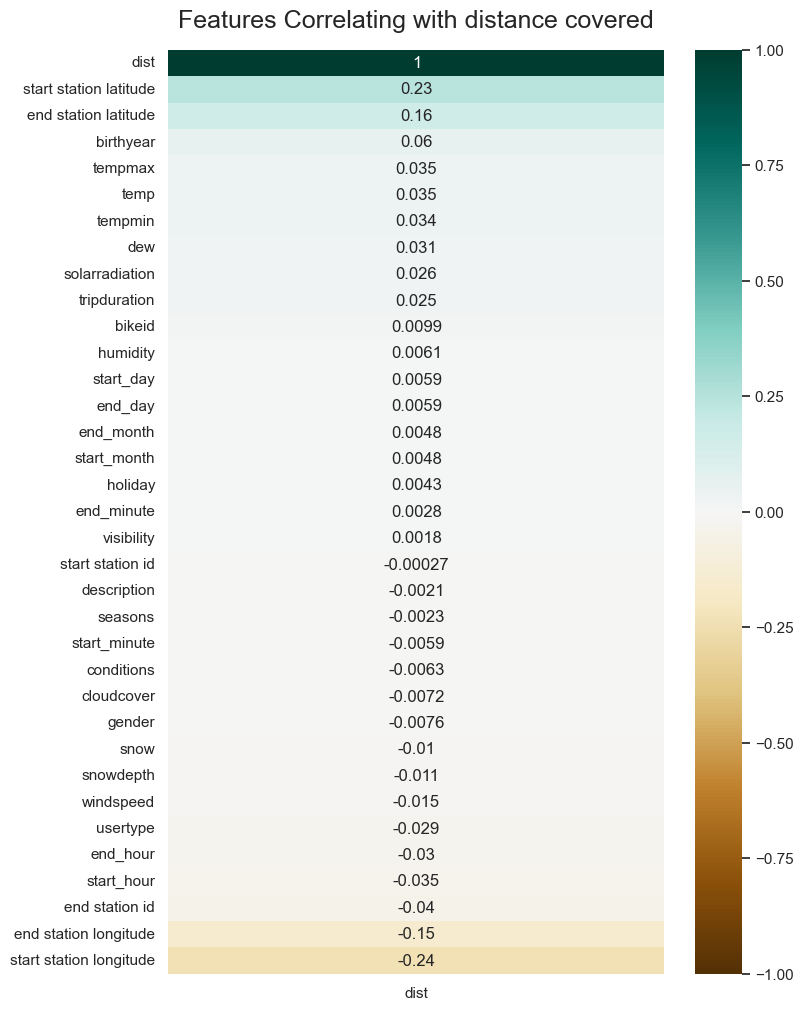

In [744]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['dist']].sort_values(by='dist', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with distance covered', fontdict={'fontsize':18}, pad=16);

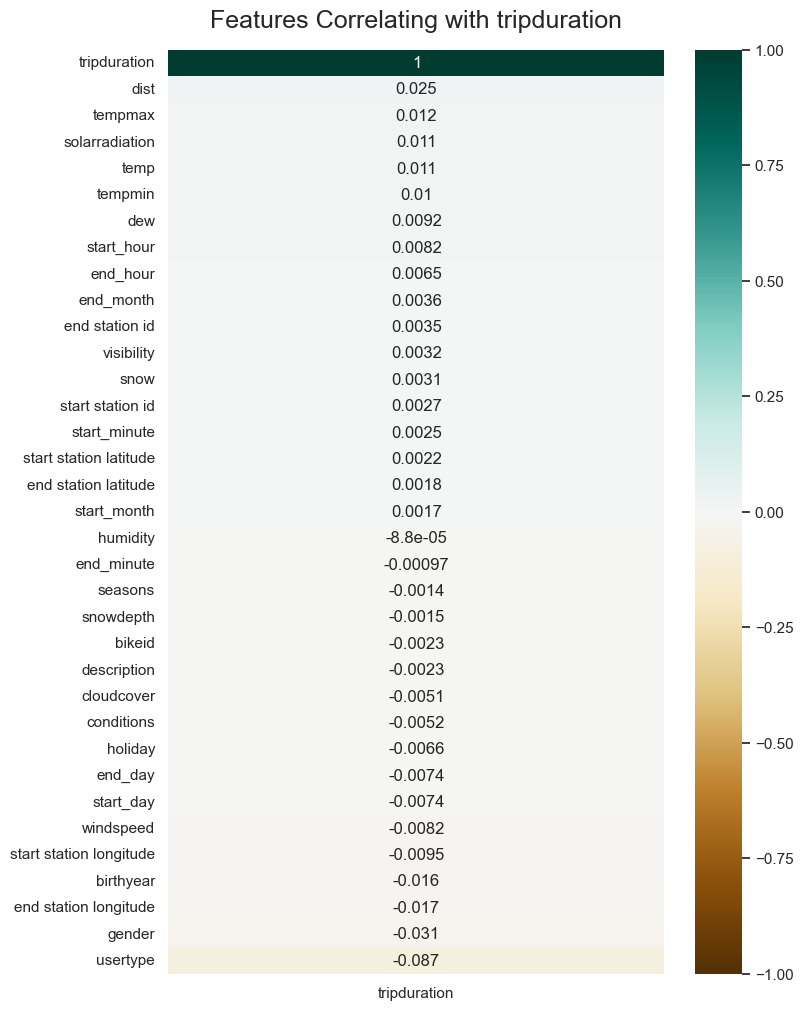

In [745]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['tripduration']].sort_values(by='tripduration', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with tripduration', fontdict={'fontsize':18}, pad=16);

In [746]:
tripdata.var()

tripduration               1.362675e+04
start station id           1.916262e+04
start station latitude     5.258205e-05
start station longitude    1.156774e-04
end station id             2.178872e+04
end station latitude       5.033587e-05
end station longitude      1.157642e-04
bikeid                     6.400861e+06
birth year                 1.054427e+02
gender                     2.501981e-01
dist                       1.594231e-01
year                       5.169893e-26
start_hour                 2.659611e+01
end_hour                   2.687274e+01
start_minute               2.981187e+02
end_minute                 3.004060e+02
tempmax                    8.344574e+01
tempmin                    7.639777e+01
temp                       7.750681e+01
dew                        1.005343e+02
humidity                   2.194647e+02
snow                       3.968084e-01
snowdepth                  1.230775e+00
windspeed                  6.693457e+01
visibility                 4.472174e+00


In [747]:
abs(tripdata.corr()['tripduration'])

tripduration               1.000000
start station id           0.002712
start station latitude     0.002185
start station longitude    0.009462
end station id             0.003527
end station latitude       0.001804
end station longitude      0.016569
bikeid                     0.002307
birth year                 0.016208
gender                     0.031440
dist                       0.025337
year                            NaN
start_hour                 0.008158
end_hour                   0.006533
start_minute               0.002453
end_minute                 0.000971
tempmax                    0.012093
tempmin                    0.010225
temp                       0.011308
dew                        0.009163
humidity                   0.000088
snow                       0.003080
snowdepth                  0.001519
windspeed                  0.008217
visibility                 0.003241
solarradiation             0.011452
cloudcover                 0.005124
birthyear                  0

#### comments on feature 

1. with respect to avearge temperature 
    * tempmin
	* tempmax
	* dew 
	* solarradiation
	* humidity  
has postive correaltion on the other hand 
	* windspeed
	* snowdepth
	* snow
has the negitive correaltion


2. with respect to dist travelled  
    * start station lat 
	* end station lat
	* birth year 
has postive correaltion on the other hand 
	* start station lan
	* end station lan
has the negitive correaltion

3. with respect to tripduration
	* usertype 
	* gender
has the negitive correaltion	


### Some important time series garphs 

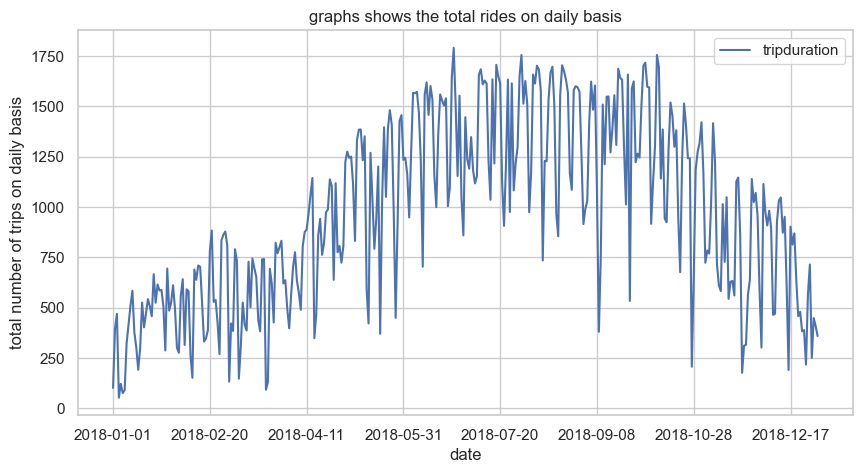

In [748]:
df = tripdata.groupby(['date'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total rides on daily basis')
ax.set(xlabel='date', ylabel='total number of trips on daily basis')
plt.show()

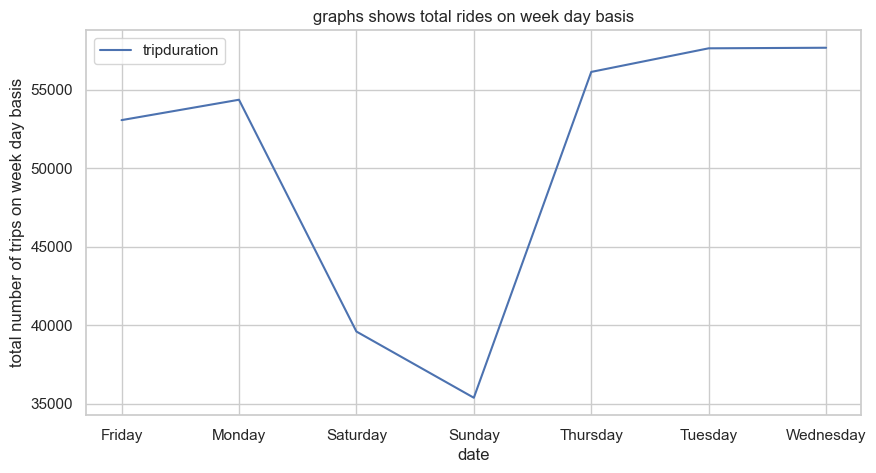

In [749]:
df = tripdata.groupby(['start_day'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='start_day', y='tripduration',figsize=(10,5),title='graphs shows total rides on week day basis')
ax.set(xlabel='date', ylabel='total number of trips on week day basis')
plt.show()

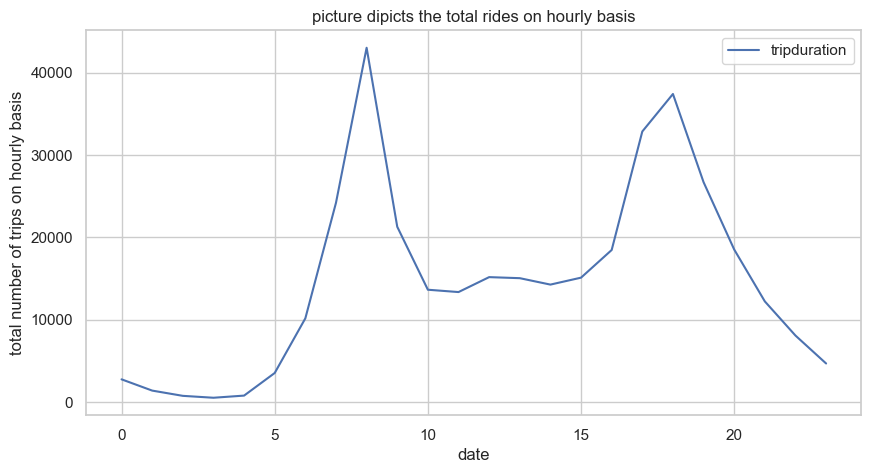

In [750]:
df = tripdata.groupby(['start_hour'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='start_hour', y='tripduration',figsize=(10,5),title='picture dipicts the total rides on hourly basis')
ax.set(xlabel='date', ylabel='total number of trips on hourly basis')
plt.show()

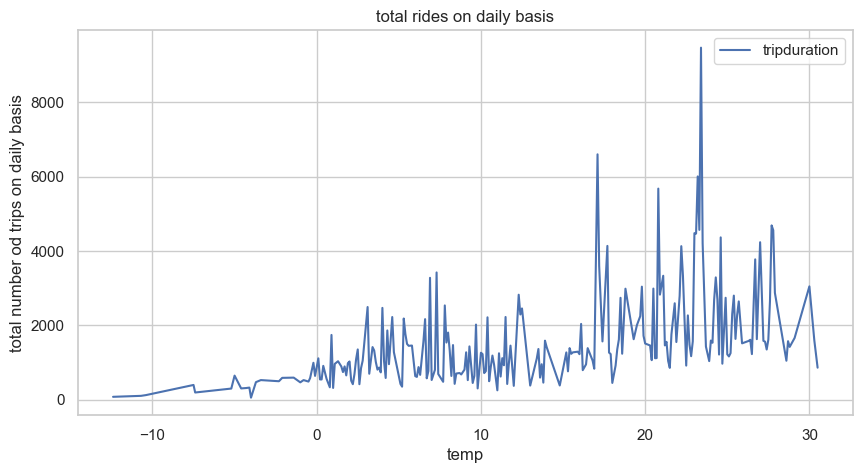

In [751]:
df = tripdata.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='total rides on daily basis')
ax.set(xlabel='temp', ylabel='total number od trips on daily basis')
plt.show()

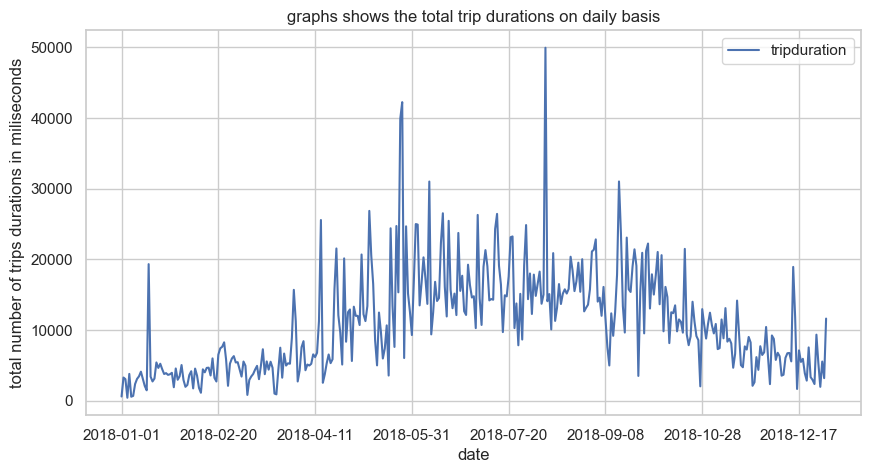

In [752]:
df = tripdata.groupby(['date'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total trip durations on daily basis')
ax.set(xlabel='date', ylabel='total number of trips durations in miliseconds')
plt.show()


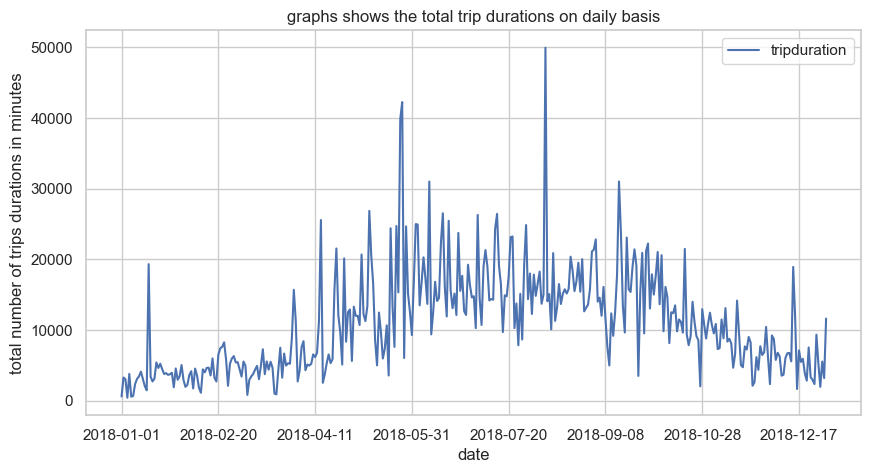

In [753]:
df = tripdata.groupby(['date'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total trip durations on daily basis')
ax.set(xlabel='date', ylabel='total number of trips durations in minutes')
plt.show()